In [39]:
def calculate_slice_bboxes(
    image_height: int,
    image_width: int,
    slice_height: int = 512,
    slice_width: int = 512,
    overlap_height_ratio: float = 0.5,
    overlap_width_ratio: float = 0.5,
) -> list[list[int]]:
    """
    Given the height and width of an image, calculates how to divide the image into
    overlapping slices according to the height and width provided. These slices are returned
    as bounding boxes in xyxy format.
    :param image_height: Height of the original image.
    :param image_width: Width of the original image.
    :param slice_height: Height of each slice
    :param slice_width: Width of each slice
    :param overlap_height_ratio: Fractional overlap in height of each slice (e.g. an overlap of 0.2 for a slice of size 100 yields an overlap of 20 pixels)
    :param overlap_width_ratio: Fractional overlap in width of each slice (e.g. an overlap of 0.2 for a slice of size 100 yields an overlap of 20 pixels)
    :return: a list of bounding boxes in xyxy format
    """

    slice_bboxes = []
    y_max = y_min = 0
    y_overlap = int(overlap_height_ratio * slice_height)
    x_overlap = int(overlap_width_ratio * slice_width)
    while y_max < image_height:
        x_min = x_max = 0
        y_max = y_min + slice_height
        while x_max < image_width:
            x_max = x_min + slice_width
            if y_max > image_height or x_max > image_width:
                xmax = min(image_width, x_max)
                ymax = min(image_height, y_max)
                xmin = max(0, xmax - slice_width)
                ymin = max(0, ymax - slice_height)
                slice_bboxes.append([xmin, ymin, xmax, ymax])
            else:
                slice_bboxes.append([x_min, y_min, x_max, y_max])
            x_min = x_max - x_overlap
        y_min = y_max - y_overlap
    return slice_bboxes

In [36]:
#import matplotlib.pyplot as plt


In [40]:
data = np.zeros([768, 1024])
patchsize=[512, 512]
step=[256, 256]

list_slices = calculate_slice_bboxes(data.shape[0], data.shape[1])

In [41]:
list_slices

[[0, 0, 512, 512],
 [256, 0, 768, 512],
 [512, 0, 1024, 512],
 [0, 256, 512, 768],
 [256, 256, 768, 768],
 [512, 256, 1024, 768]]

In [28]:
for i in list_slices:
    print(i)

[0, 0, 512, 512]
[410, 0, 922, 512]
[512, 0, 1024, 512]
[0, 256, 512, 768]
[410, 256, 922, 768]
[512, 256, 1024, 768]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.imshow(data)

#add rectangle to plot
ax.add_patch(Rectangle((512, 0), 512, 512,
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=True,
             lw=5))

#display plot
plt.show()

In [15]:
regular_patching_2D(data, patchsize=[512, 512], step = [256,256])

Extracting 2 patches


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [1]:
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
os.chdir('C:/Users/mlo/OneDrive - GEUS/DATA/SPE_hackathon/')


In [2]:
folder_list = ['./dataset1']

dataset1 = {}

dataset_list = [dataset1]

cmap_mask =(mpl.colors.ListedColormap(['white','white','#000000', '#ff0000', '#00ff00', '#ffff00']))
cmap_pred =(mpl.colors.ListedColormap(['#000000', '#ff0000', '#00ff00', '#ffff00']))


fontsize_title = 18
fontsize_suptitle = 30

k = 0


for folder in folder_list:
    print('For', folder, ':')
    path_folder_cl = folder + '/CL/'
    path_folder_bse = folder + '/BSE/'
    path_folder_mm = folder + '/MM/'
    path_folder_mask = folder + '/final_test_mads_mask/'

    onlyfiles_cl = [f for f in listdir(path_folder_cl) if isfile(join(path_folder_cl, f))]
    onlyfiles_bse = [f for f in listdir( path_folder_bse) if isfile(join(path_folder_bse, f))]
    onlyfiles_mm = [f for f in listdir(path_folder_mm) if isfile(join(path_folder_mm, f))]
    onlyfiles_mask = [f for f in listdir(path_folder_mask) if isfile(join(path_folder_mask, f))]   

    print('Found' , len(onlyfiles_cl), 'files in CL folder:')
    print('Found' , len(onlyfiles_bse), 'files in BSE folder:')
    print('Found' , len(onlyfiles_mm), 'files in MM folder:')
    print('Found' , len(onlyfiles_mask), 'files in MASK folder:')

im_list = []
h, w  = (768, 1024)



for im_name in onlyfiles_cl:
    # Check if image is in BSE, MM and MASK folder
    #print(im_name)
    if isfile(join(path_folder_bse, im_name)) and isfile(join(path_folder_mm, im_name)) and isfile(join(path_folder_mask, im_name.replace('.tif' , '_mask_cleaned.tif'))) == True:
        im_list.append(im_name)
        dataset_list[k]['CL_'+im_name]   = cv2.imread(path_folder_cl   + im_name , 0)
        dataset_list[k]['BSE_'+im_name]  = cv2.imread(path_folder_bse  + im_name , 0)
        dataset_list[k]['MM_'+im_name]   = cv2.imread(path_folder_mm   + im_name , 0)
        dataset_list[k]['MASK_'+im_name] = cv2.imread(path_folder_mask + im_name.replace('.tif' , '_mask_cleaned.tif') , 0)

        # Mering images into large frames (2048 x 2048)
        input_dummy = np.zeros([ w*2 , w*2]) - 1
        mask_dummy  = np.zeros([ w*2 , w*2]) - 1
        
        input_dummy[:h, :w]    = dataset_list[k]['BSE_'+im_name]
        input_dummy[:h, w:w*2] = dataset_list[k]['CL_'+im_name] 
        input_dummy[h:h*2, :w] = dataset_list[k]['MM_'+im_name] 

        mask_dummy[:h, :w]    = dataset_list[k]['MASK_'+im_name] 

        dataset_list[k]['X_'+im_name] = input_dummy
        dataset_list[k]['y_'+im_name] = mask_dummy

For ./dataset1 :
Found 1000 files in CL folder:
Found 1000 files in BSE folder:
Found 1000 files in MM folder:
Found 220 files in MASK folder:


In [3]:
folder_list = ['./dataset1']

dataset1 = {}

dataset_list = [dataset1]

cmap_mask =(mpl.colors.ListedColormap(['white','white','#000000', '#ff0000', '#00ff00', '#ffff00']))
cmap_pred =(mpl.colors.ListedColormap(['#000000', '#ff0000', '#00ff00', '#ffff00']))


fontsize_title = 18
fontsize_suptitle = 30

k = 0


for folder in folder_list:
    print('For', folder, ':')
    path_folder_cl = folder + '/CL/'
    path_folder_bse = folder + '/BSE/'
    path_folder_mm = folder + '/MM/'
    path_folder_mask = folder + '/final_test_mads_mask/'

    onlyfiles_cl = [f for f in listdir(path_folder_cl) if isfile(join(path_folder_cl, f))]
    onlyfiles_bse = [f for f in listdir( path_folder_bse) if isfile(join(path_folder_bse, f))]
    onlyfiles_mm = [f for f in listdir(path_folder_mm) if isfile(join(path_folder_mm, f))]
    onlyfiles_mask = [f for f in listdir(path_folder_mask) if isfile(join(path_folder_mask, f))]   

    print('Found' , len(onlyfiles_cl), 'files in CL folder:')
    print('Found' , len(onlyfiles_bse), 'files in BSE folder:')
    print('Found' , len(onlyfiles_mm), 'files in MM folder:')
    print('Found' , len(onlyfiles_mask), 'files in MASK folder:')

im_list = []
h, w  = (768, 1024)


X = np.zeros([len(onlyfiles_mask), w*2, w*2])
y = np.zeros(X.shape)


k=0
for im_name in onlyfiles_cl:
    # Check if image is in BSE, MM and MASK folder
    #print(im_name)
    if isfile(join(path_folder_bse, im_name)) and isfile(join(path_folder_mm, im_name)) and isfile(join(path_folder_mask, im_name.replace('.tif' , '_mask_cleaned.tif'))) == True:
        im_list.append(im_name)
  # dataset_list[k]['CL_'+im_name]   = cv2.imread(path_folder_cl   + im_name , 0)
  # dataset_list[k]['BSE_'+im_name]  = cv2.imread(path_folder_bse  + im_name , 0)
  # dataset_list[k]['MM_'+im_name]   = cv2.imread(path_folder_mm   + im_name , 0)
  # dataset_list[k]['MASK_'+im_name] = cv2.imread(path_folder_mask + im_name.replace('.tif' , '_mask_cleaned.tif') , 0)

        # Mering images into large frames (2048 x 2048)
        input_dummy = np.zeros([ w*2 , w*2]) 
        mask_dummy  = np.zeros([ w*2 , w*2]) - 1
        
        input_dummy[:h, :w]    = cv2.imread(path_folder_bse  + im_name , 0)
        input_dummy[:h, w:w*2] = cv2.imread(path_folder_cl   + im_name , 0)
        input_dummy[h:h*2, :w] = cv2.imread(path_folder_mm   + im_name , 0)
        mask_dummy[:h, :w]    = cv2.imread(path_folder_mask + im_name.replace('.tif' , '_mask_cleaned.tif') , 0)

        X[k,:,:] = input_dummy
        y[k,:,:] = mask_dummy

        k += 1 
        #dataset_list[k]['X_'+im_name] = input_dummy
        #dataset_list[k]['y_'+im_name] = mask_dummy

X = X.astype('uint8')
X = X / 255 

y = y.astype('int8')
y[y==0] = -1
print('Unique mask IDs:' , np.unique(y), 'of dtype:', y.dtype)
print('Done!')

For ./dataset1 :
Found 1000 files in CL folder:
Found 1000 files in BSE folder:
Found 1000 files in MM folder:
Found 220 files in MASK folder:
Unique mask IDs: [-1  1  2  3  4] of dtype: int8
Done!


In [4]:
ids = np.arange(X.shape[0])
np.random.shuffle(ids)
test_size =int(X.shape[0]*0.8)
train_ind = ids[:test_size]
test_ind = ids[test_size:]

X_train = X[train_ind]
X_test = X[test_ind]
y_train = y[train_ind]
y_test = y[test_ind]

im_list_train = np.array(im_list)[train_ind]
im_list_test = np.array(im_list)[test_ind]

In [8]:
import tensorflow as tf

ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (c:\Users\mlo\Anaconda3\envs\assesSEM\lib\site-packages\tensorflow\python\eager\def_function.py)

In [7]:
tf.__version__

NameError: name 'tf' is not defined

In [3]:
n_classes =  5
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

NameError: name 'y_train' is not defined

In [2]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Putting data into X and y variables for UNet input:

In [5]:
X = np.zeros([len(im_list), input_dummy.shape[0], input_dummy.shape[1]])
y = np.zeros(X.shape)

k = 0
for im in im_list:
    X[k,:,:] = dataset1['X_' + im]
    y[k,:,:] = dataset1['y_' + im]

    k += 1 

X = X.astype('uint8')
X = X / 255 

y = y.astype('int8')
y[y==0] = -1
print('Unique mask IDs:' , np.unique(y), 'of dtype:', y.dtype)
print('Done!')

Unique mask IDs: [-1  1  2  3  4] of dtype: int8
Done!


In [6]:
np.save('X.npy', X)
np.save('y.npy', y)

Demo plot:

Text(0.5, 0.98, 'image10_22_1.tif')

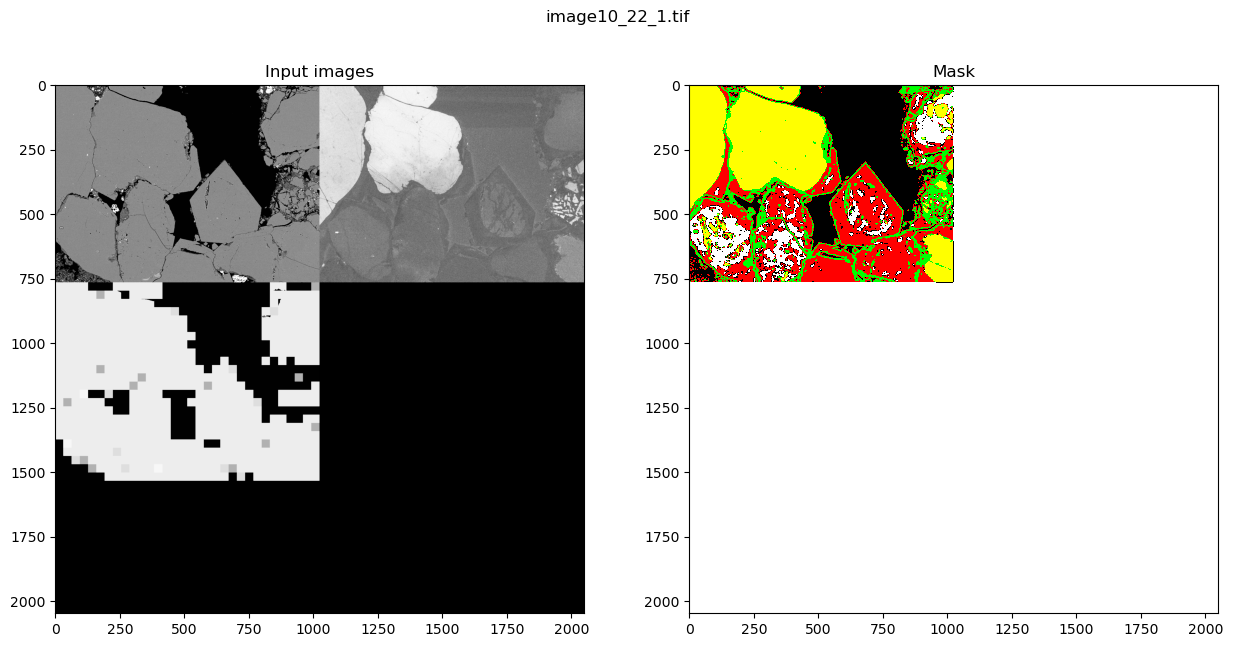

In [14]:
#cmap_mask =(mpl.colors.ListedColormap(['white','white','y', 'g', 'r', 'k']))
cmap_mask =(mpl.colors.ListedColormap(['white','white','#000000', '#ff0000', '#00ff00', '#ffff00']))
i=10

f, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(X[:,:,i], cmap = 'Greys_r')
ax[0].set_title('Input images')
ax[1].imshow(y[:,:,i], cmap = cmap_mask)
ax[1].set_title('Mask')
plt.suptitle(im_list[i])